Name: Erick Correia Silva


reconhecimento de digitos do MNIST com tensoflow


In [ ]:
#imports 
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt




### Carregando o Dataset MNIST


In [ ]:
#o carregamento é simples
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data() 

#visualizemos o seu formato
print(y_train_raw[0])
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)

5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


###  Tratando os Dados Categóricos



In [ ]:
print( y_train_raw[0:4])

[5 0 4 1]


In [ ]:
#conversão de labels (rótulos) em one-hot vectors (one-hot codes).
num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)

#resultado para a 1ª amostra
print( 'categoria original: ',  y_train_raw[0])
print( 'vetor one-hot correspondente: ',  y_train[0])

#resultado para as amostras 2, 3, 4 e 5
print( '\ncategorias originais:\n',  y_train_raw[1:5])
print( 'vetores one-hot correspondentes:\n',  y_train[1:5])

categoria original:  5
vetor one-hot correspondente:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

categorias originais:
 [0 4 1 9]
vetores one-hot correspondentes:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### Visualizando Imagens do Dataset


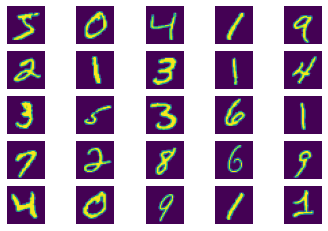

In [ ]:
#Desenhando as 25 primeiras imagens do conjunto de treinamento.
plt.figure()
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow( x_train_raw[i] )
    plt.ylabel( y_train_raw[i] )
    plt.axis('off')
plt.show()

### Pré-Processamento dos Dados



In [ ]:
#conversão simples
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

In [ ]:
#ajusta a faixa dinâmica de valores
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0


### Construindo e Treinando uma DNN


In [ ]:
#modelo DNN:
# 3 camadas totalmente conectadas e ativações ReLU.
# a saída usa softmax para favorecer a classificação baseada em one-hot vector
model = keras.Sequential([ 
    layers.Dense(512, activation='relu', input_dim = 784),    
    layers.Dense(256, activation='relu'),
    layers.Dense(124, activation='relu'),
    layers.Dense(num_classes, activation='softmax')])

#visualiza o modelo: 512
print( model.input_shape )
print( model.summary() )

(None, 784)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 124)               31868     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1250      
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________
None


#### Configurando a Aprendizagem da DNN


In [ ]:
# Adam com learning rate = 0.001
Optimizer = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Optimizer,
              metrics=['accuracy'])

####  Treinando o Modelo DNN

In [ ]:
# verifica uso da GPU
print( tf.config.list_physical_devices('GPU') )
print()

#treinamento é realizado usando:
#10 épocas, divididas em batches grandes (128 amostras cada)
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2246 - accuracy: 0.9342
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0833 - accuracy: 0.9749
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0529 - accuracy: 0.9836
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0417 - accuracy: 0.9862
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0302 - accuracy: 0.9905
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0243 - accuracy: 0.9917
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0206 - accuracy: 0.9931
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0204 - accuracy: 0.9931
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0165 - accuracy: 0.9942
Epoch 10/10
469/469 [===========

#### Avaliando o Modelo DNN
O desempenho do modelo é avaliado em termos de loss e de acurácia, sendo que essa métrica foi fornecida durante a etapa de configuração.

In [ ]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0868203341960907
Test accuracy: 0.9801999926567078


####  Salvando o Modelo DNN Treinado

In [ ]:
try:
    os.makedirs('mnist_model')
    print('creating \'./mnist_model/\'')
except FileExistsError as e:
    print('\'./mnist_model/\' already exists')

model.save('./mnist_model/final_DNN_model.h5')

'./mnist_model/' already exists


###Construindo e Treinando uma CNN


#### Construindo uma CNN


In [ ]:
#é um modelo de camadas sequenciais
model=keras.Sequential()
#primeira convolução com kernel 5x5 + pooling 2x2
model.add(keras.layers.Conv2D(filters=32,kernel_size = 5,strides = (1,1),
                              padding = 'same',activation = tf.nn.relu,input_shape = (28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

#segunda convolução com kernel 3x3 + pooling 2x2
model.add(keras.layers.Conv2D(filters=64,kernel_size = 3,strides = (1,1),padding = 'same',activation = tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

#dropout com fator de 25% + conversão em vetor (flatten)
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())

# duas camadas densas com dropout de 50% entre elas
#a segunda camada usa softmax
model.add(keras.layers.Dense(units=128,activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10,activation = tf.nn.softmax))

#exibe o resultado
print( model.summary() )

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

#### Treinando o Modelo CNN


In [ ]:
# verifica se estamos usando GPU
print( tf.config.list_physical_devices('GPU') )
print()


X_train=x_train.reshape(60000,28,28,1)
X_test=x_test.reshape(10000,28,28,1)

#reutilizando Adam e os outros parâmetros adotados na DNN
model.compile( optimizer=keras.optimizers.Adam(0.001),
               loss="categorical_crossentropy",
               metrics=['accuracy']) 

#treinamento: 5 épocas 
model.fit(x=X_train,y=y_train,epochs=10,batch_size=128)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.2879 - accuracy: 0.9097
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0914 - accuracy: 0.9724
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0714 - accuracy: 0.9791
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0574 - accuracy: 0.9823
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0503 - accuracy: 0.9848
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0450 - accuracy: 0.9861
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0394 - accuracy: 0.9881
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0366 - accuracy: 0.9889
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0310 - accuracy: 0.9905
Epoch 10/10
469/469 [===========

####  Avaliando o Modelo CNN


In [ ]:
test_loss,test_acc=model.evaluate(x=X_test,y=y_test)

print("\nAcurácia de Teste: %.4f"%test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0229 - accuracy: 0.9931

Acurácia de Teste: 0.9931


####  Salvando o Modelo CNN


In [ ]:
model.save('./mnist_model/final_CNN_model.h5')

####  Inferência e Visualização de Resultados

In [ ]:
#apenas 1 linha para recuperar o modelo: recria a estrutura e povoa os pesos
new_model = load_model('./mnist_model/final_CNN_model.h5')

predições para as primeiras 50 imagens de teste:
7,2,1,0,4,	
1,4,9,5,9,	
0,6,9,0,1,	
5,9,7,3,4,	
9,6,6,5,4,	
0,7,4,0,1,	
3,1,3,4,7,	
2,7,1,2,1,	
1,7,4,2,3,	
5,1,2,4,4,	
primeiras 50 imagens de teste:


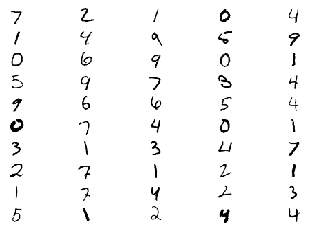

In [ ]:
# visualiza N imagens
%matplotlib inline
def res_Visual(n):
    # efetua as predições:
    # - argmax() converte os one-hot vector da camada de saída no id da classe
    final_opt_a = np.argmax(new_model.predict(X_test[0:n]), axis=-1)    
    fig, ax = plt.subplots(nrows=int(n/5),ncols=5 )
    ax = ax.flatten()
    print('predições para as primeiras {} imagens de teste:'.format(n))
    for i in range(n):
        print(final_opt_a[i],end=',')
        if int((i+1)%5) ==0:
            print('\t')
        #Visualize image display.
        img = X_test[i].reshape((28,28))#Read each row of data in the format of Ndarry.
        plt.axis("off")
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')#Visualization
        ax[i].axis("off")
    print('primeiras {} imagens de teste:'.format(n))


res_Visual(50)


---
